In [64]:
import warnings
warnings.filterwarnings("ignore")

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [4]:
# Load dataset
df = pd.read_csv('Salary_Data.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


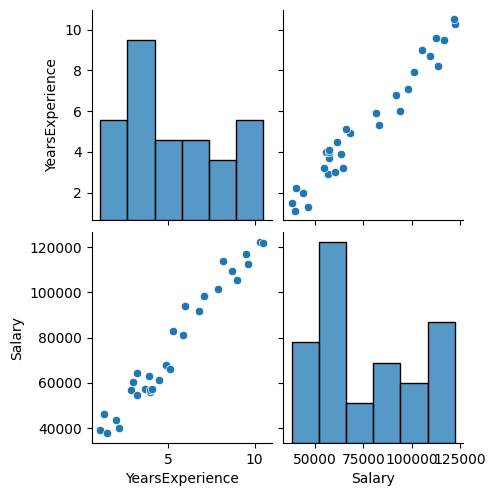

In [9]:
sns.pairplot(df)

<Axes: >

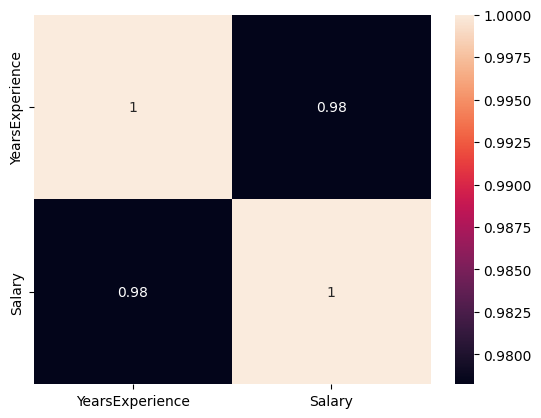

In [10]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

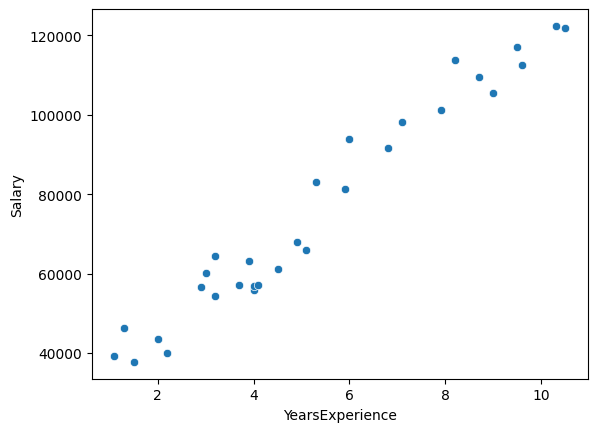

In [11]:
sns.scatterplot(data=df, x="YearsExperience", y="Salary")

In [93]:
X = df['YearsExperience']
y = df['Salary']

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [32]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [24]:
# 1. Predict pred_mean
y_train_mvp = pd.DataFrame(y_train)
Salary_pred_mean = y_train.mean()
y_train_mvp['Salary_pred_mean'] = Salary_pred_mean

In [26]:
y_train_mvp.head()

,Salary,Salary_pred_mean
23,113812,73431.333333
18,81363,73431.333333
4,39891,73431.333333
3,43525,73431.333333
24,109431,73431.333333


In [27]:
# 2. compute pred_median
Salary_pred_median = y_train.median()
y_train_mvp['Salary_pred_median'] = Salary_pred_median
y_train_mvp.head()

,Salary,Salary_pred_mean,Salary_pred_median
23,113812,73431.333333,66029.0
18,81363,73431.333333,66029.0
4,39891,73431.333333,66029.0
3,43525,73431.333333,66029.0
24,109431,73431.333333,66029.0


In [28]:
# 3. RMSE of pred_mean
rmse_train = mean_squared_error(y_train_mvp.Salary, y_train_mvp.Salary_pred_mean) ** .5
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2))

RMSE using Mean
Train/In-Sample:  26087.51


In [29]:
# 4. RMSE of pred_median
rmse_train = mean_squared_error(y_train_mvp.Salary, y_train_mvp.Salary_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2))

RMSE using Median
Train/In-Sample:  27117.39


In [33]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [34]:
y_train_mvp['Salary_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_mvp.Salary_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train)

RMSE for OLS using LinearRegression
Training/In-Sample:  5723.304601101669


In [35]:
# R2 for train
explained_variance_score(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm)


0.9518686093824901

In [36]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

In [37]:
# create the model object
lm2 = LinearRegression()

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train)

LinearRegression()

In [39]:
# predict train
y_train_mvp['Salary_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm2) ** (1/2)

In [40]:
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  5698.167884708081


In [44]:
# R2 for train
explained_variance_score(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm2)

0.9522904664527951

In [102]:
# make the polynomial features to get a new set of features
pf4 = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf4.fit_transform(X_train)

# create the model object
lm4 = LinearRegression()

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree4, y_train)

# predict train
y_train_mvp['Salary_pred_lm4'] = lm4.predict(X_train_degree4)

In [103]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm4) ** (1/2)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train)

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  5127.916081867939


In [104]:
# R2 for train
explained_variance_score(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm4)

0.9613618336557737

In [43]:
y_train_mvp.head()

,Salary,Salary_pred_mean,Salary_pred_median,Salary_pred_lm,Salary_pred_lm2
23,113812,73431.333333,66029.0,103976.626471,104038.911035
18,81363,73431.333333,66029.0,81890.733379,81364.858716
4,39891,73431.333333,66029.0,46361.253187,46586.018850
3,43525,73431.333333,66029.0,44440.740745,44765.699192
24,109431,73431.333333,66029.0,108777.907578,109075.058849


In [48]:
y_test_mvp = y_test

# predict on test
y_test_mvp['Salary_pred_lm2'] = lm2.predict(pf.fit_transform(X_test))

# evaluate: rmse
rmse_test = mean_squared_error(y_test_mvp.Salary, y_test_mvp.Salary_pred_lm2)**(1/2)

print("RMSE for 2 degree Polynomial model\nOut-of-Sample Performance: ", round(rmse_test,2))

RMSE for 2 degree Polynomial model
Out-of-Sample Performance:  5530.79


In [47]:
# R2 for test
explained_variance_score(y_test_mvp.Salary, y_test_mvp.Salary_pred_lm2)

0.9621981134685537

In [108]:
# predict on test
y_test_mvp['Salary_pred_lm4'] = lm4.predict(pf4.fit_transform(X_test))

# evaluate: rmse
rmse_test = mean_squared_error(y_test_mvp.Salary, y_test_mvp.Salary_pred_lm4)**(1/2)

print("RMSE for 4 degree Polynomial model\nOut-of-Sample Performance: ", round(rmse_test,2))

RMSE for 4 degree Polynomial model
Out-of-Sample Performance:  5469.3


In [109]:
# R2 for test
explained_variance_score(y_test_mvp.Salary, y_test_mvp.Salary_pred_lm4)

0.964341128042247

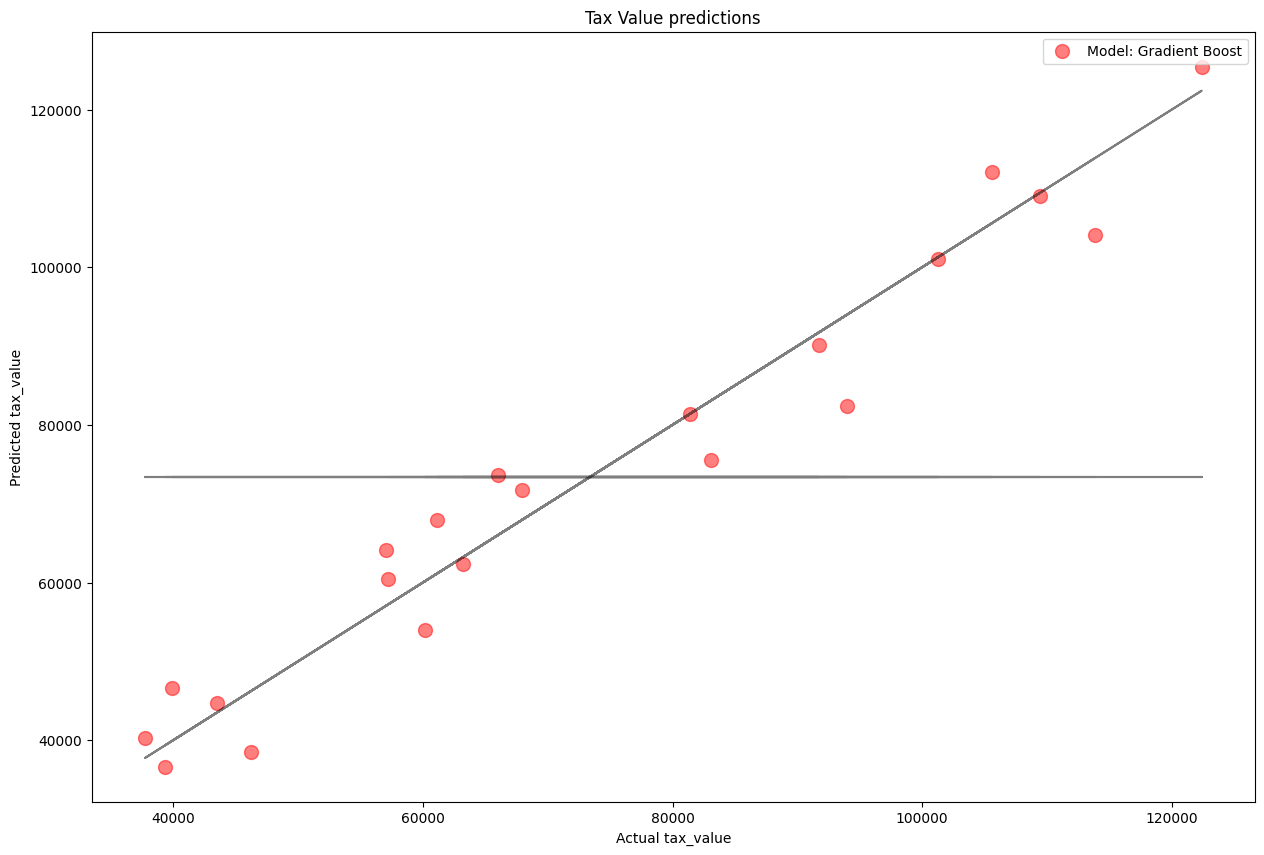

In [61]:
plt.figure(figsize=(15,10))
plt.plot(y_train_mvp.Salary, y_train_mvp.Salary_pred_mean, alpha=.5, color="black", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (0, 73431))
plt.plot(y_train_mvp.Salary, y_train_mvp.Salary, alpha=.5, color="black", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 80000), rotation=32)

plt.scatter(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm2, 
            alpha=.5, color="red", s=100, label="Model: Gradient Boost")

plt.legend()
plt.xlabel("Actual tax_value")
plt.ylabel("Predicted tax_value")
plt.title("Tax Value predictions")

plt.show()


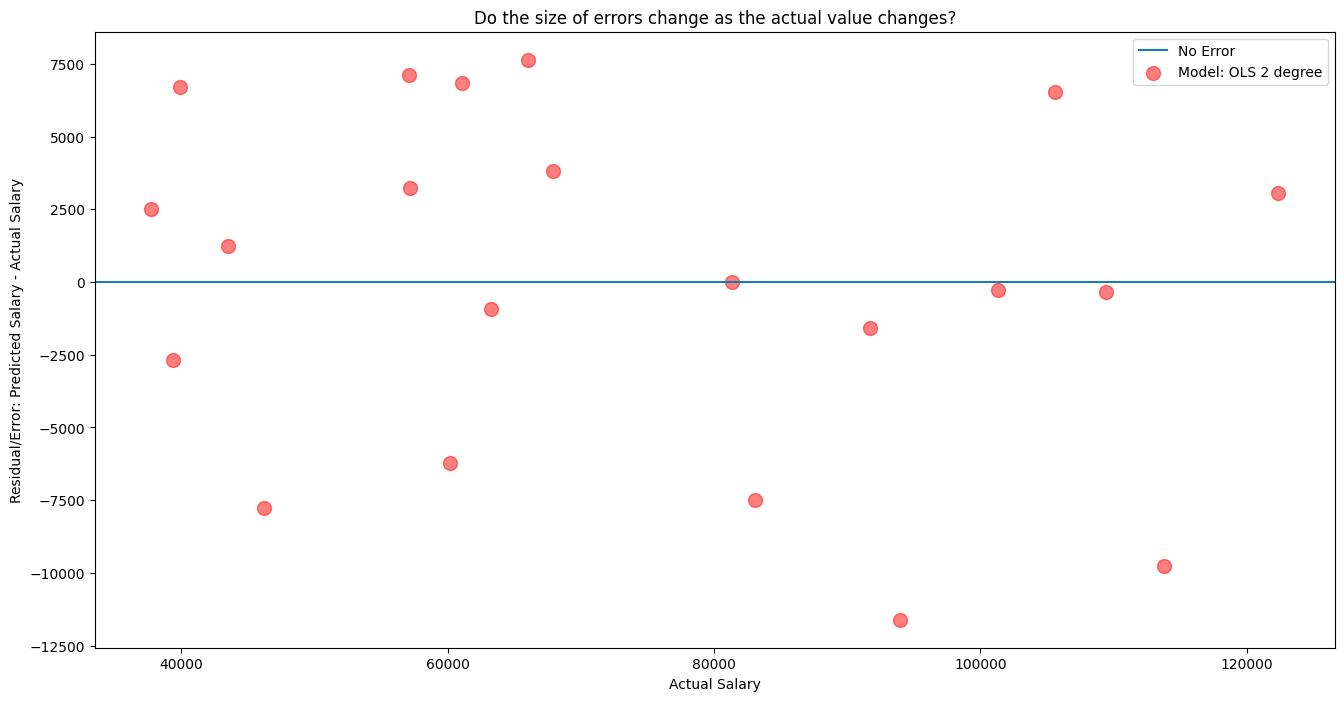

In [58]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_train_mvp.Salary, y_train_mvp.Salary_pred_lm2-y_train_mvp.Salary, 
            alpha=.5, color="red", s=100, label="Model: OLS 2 degree")

plt.legend()
plt.xlabel("Actual Salary")
plt.ylabel("Residual/Error: Predicted Salary - Actual Salary")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("No obvious residual trend, model captures data well",(100,100))

plt.show()


In [97]:
X = df[['YearsExperience']]
y = df[['Salary']]

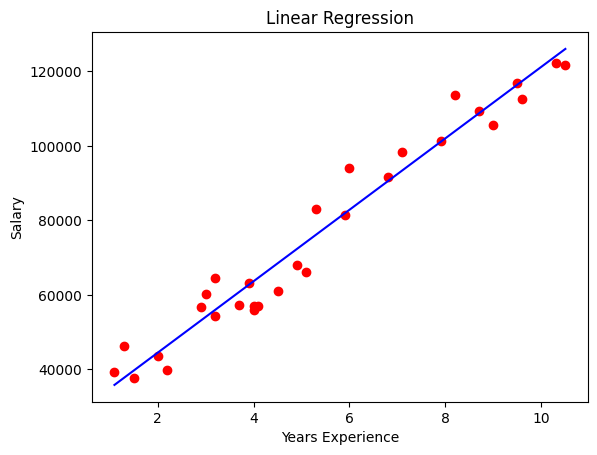

In [110]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lm.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Years Experience')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

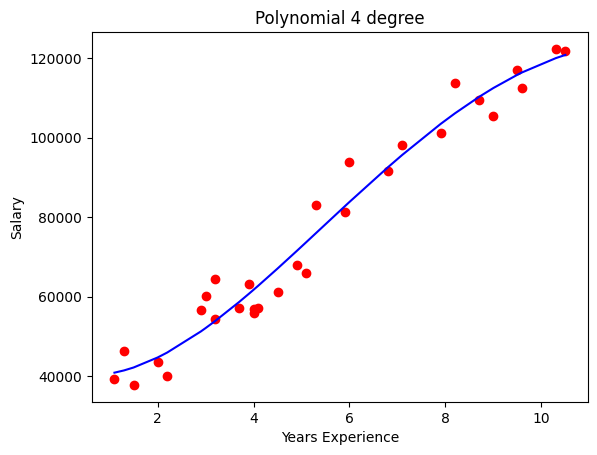

In [111]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Polynomial 4 degree')
    plt.xlabel('Years Experience')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [106]:
# Prompt the user to enter a salary
print('Salary prediction: ')
try:
    Salary = float(input("Enter experience (in years): "))
except ValueError:
    print("Invalid input. Please enter numeric values.")
    sys.exit()

# Input as numpy array
input_features = np.array([[Salary]])
input_transform = pf4.fit_transform(input_features)


# Make prediction
prediction = lm4.predict(input_transform)
prediction = prediction[0][0]
print(f"The predicted Salary is: ${prediction:.2f}")

Salary prediction: 
Enter experience (in years): 5
The predicted Salary is: $72678.87


In [89]:
prediction

72712.53010071776

In [90]:
print(f"The predicted Salary is: ${prediction:.2f}")

The predicted Salary is: 72712.53


In [96]:
type(X)

pandas.core.series.Series